## Exercise 5.04: Building a Linear Model Predicting Customer Spend

In [25]:
df = pd.read_csv('wrangled_transactions.csv', index_col='CustomerID')

In [26]:
df.corr()

,revenue_2019,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,revenue_2020
revenue_2019,1.000000,0.109692,-0.254964,0.504438,0.779401,0.548234
days_since_first_purchase,0.109692,1.000000,0.641574,0.327502,-0.074321,0.061743
days_since_last_purchase,-0.254964,0.641574,1.000000,-0.398268,-0.054051,-0.171294
number_of_purchases,0.504438,0.327502,-0.398268,1.000000,-0.012466,0.355751
avg_order_cost,0.779401,-0.074321,-0.054051,-0.012466,1.000000,0.357384
revenue_2020,0.548234,0.061743,-0.171294,0.355751,0.357384,1.000000


In [27]:
X = df[['revenue_2019',
       'days_since_last_purchase',
       'number_of_purchases',
       'avg_order_cost'
       ]]
y = df['revenue_2020']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

In [29]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [30]:
model.coef_

array([  5.78799016,   7.47737544, 336.60769871,  -2.0558923 ])

In [31]:
model.intercept_

264.8693265705988

In [32]:
single_customer = pd.DataFrame({
    'revenue_2019': [1000],
    'days_since_last_purchase': [20],
    'number_of_purchases': [2],
    'avg_order_cost': [500]
})

model.predict(single_customer)

array([5847.67624446])

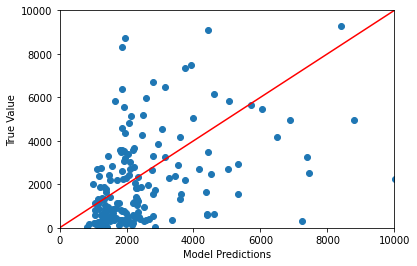

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(model.predict(X_test),y_test)
plt.xlim(0,10000)
plt.ylim(0,10000)
plt.plot([0, 10000], [0, 10000], 'k-', color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.show()

In [34]:
np.corrcoef(model.predict(X_test), y_test)

array([[1.        , 0.61257401],
       [0.61257401, 1.        ]])